In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [3]:
test_GMM = GMM_Constrainted(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3,scale=0.5)
print(init_params) 
#### Notice how only a single set of 'sqrt_covs' matrices have been initialized as here all the components share the same covariance

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'sqrt_covs': array([[1., 0.],
       [0., 1.]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.8 and learning rate = 9e-4
params_store = test_GMM.fit(init_params,"grad_descent", learning_rate = 0.0009, mass = 0.8, maxiter = 100) 

Log likelihood -720.8092616186832
Log likelihood -713.8910013012256
Log likelihood -702.195833872699
Log likelihood -688.2919666478814
Log likelihood -675.2823078440512
Log likelihood -666.503014618501
Log likelihood -664.031879949132
Log likelihood -666.0491930198806
Log likelihood -666.9097879692818
Log likelihood -663.5416942201682
Log likelihood -658.8410584727726
Log likelihood -656.1822817270356
Log likelihood -655.9076644742253
Log likelihood -656.728309097562
Log likelihood -657.4636940077587
Log likelihood -657.6045582599806
Log likelihood -657.2151833894802
Log likelihood -656.6469311666859
Log likelihood -656.2469514067093
Log likelihood -656.1509787800867
Log likelihood -656.2430409113254
Log likelihood -656.3005158643216
Log likelihood -656.1967074174463
Log likelihood -655.9754658780907
Log likelihood -655.7613378601483
Log likelihood -655.6368058913608
Log likelihood -655.6006199196472
Log likelihood -655.603129241011
Log likelihood -655.5977650846362
Log likelihood -655

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -720.8092616186832
aic,bic 1463.6185232373664 1504.3601304585845


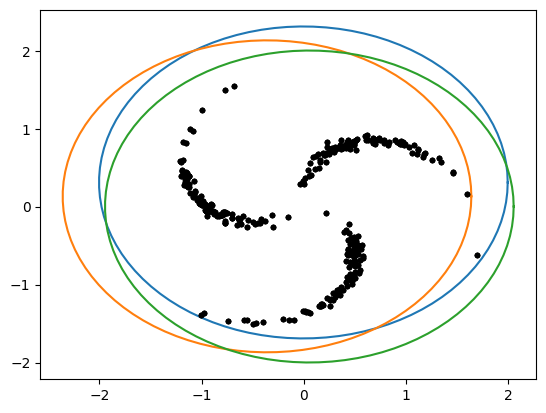

likelihood -713.8910013012256
aic,bic 1449.7820026024513 1490.5236098236694


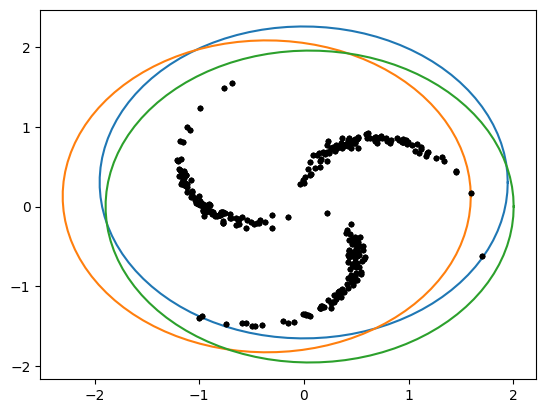

likelihood -702.195833872699
aic,bic 1426.391667745398 1467.1332749666162


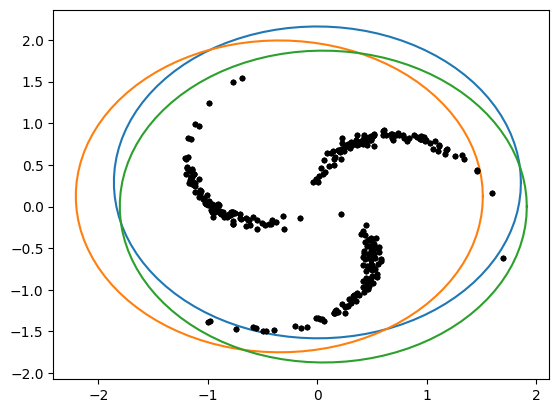

likelihood -688.2919666478814
aic,bic 1398.5839332957628 1439.325540516981


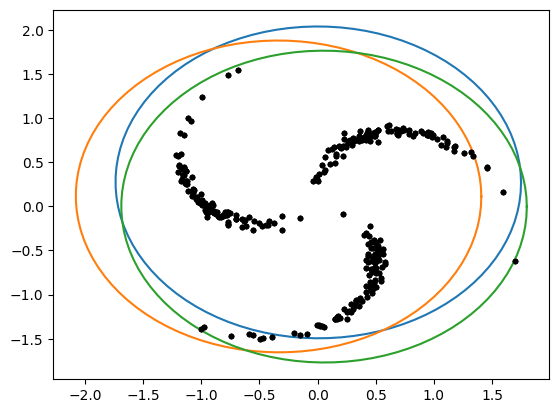

likelihood -675.2823078440512
aic,bic 1372.5646156881023 1413.3062229093205


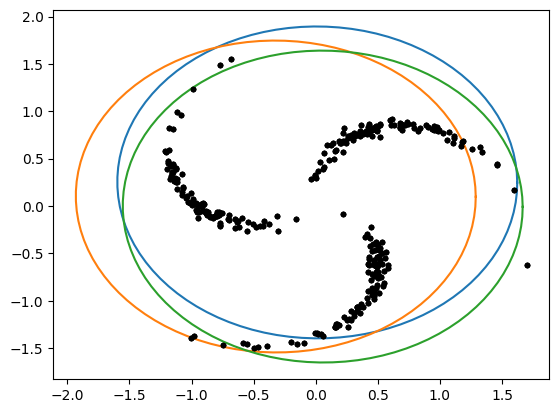

likelihood -666.503014618501
aic,bic 1355.006029237002 1395.74763645822


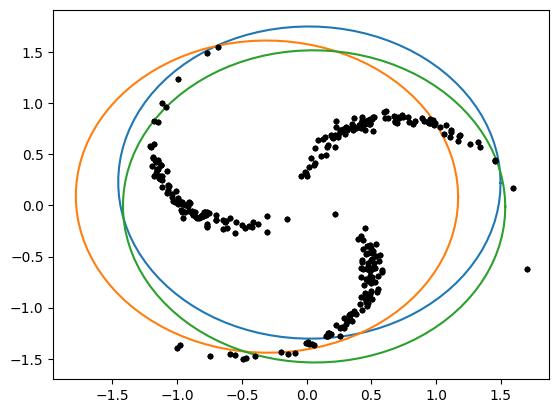

likelihood -664.031879949132
aic,bic 1350.063759898264 1390.805367119482


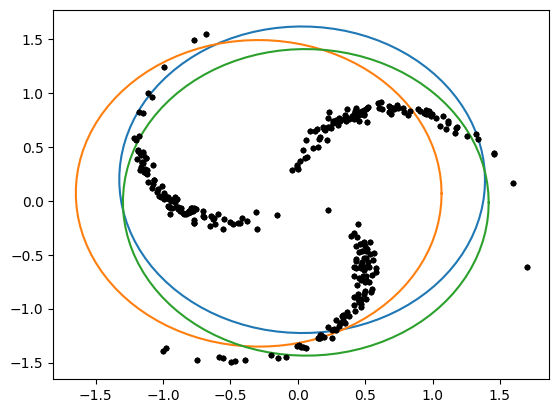

likelihood -666.0491930198806
aic,bic 1354.0983860397612 1394.8399932609793


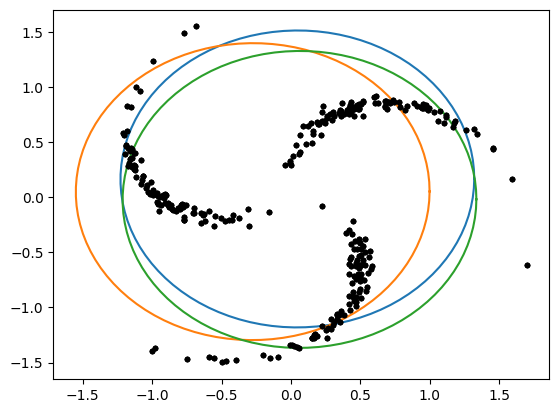

likelihood -666.9097879692818
aic,bic 1355.8195759385635 1396.5611831597816


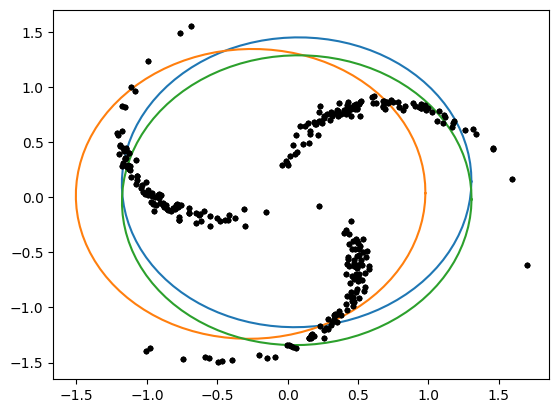

likelihood -663.5416942201682
aic,bic 1349.0833884403364 1389.8249956615546


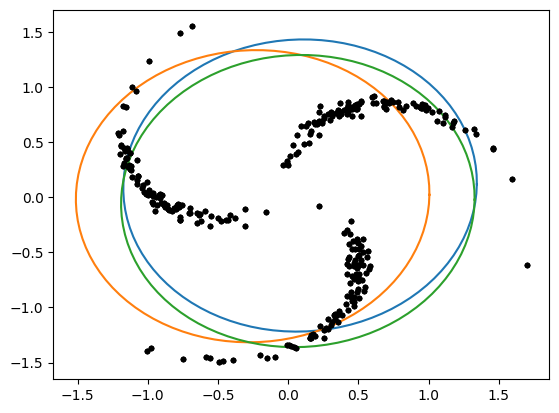

likelihood -658.8410584727726
aic,bic 1339.6821169455452 1380.4237241667633


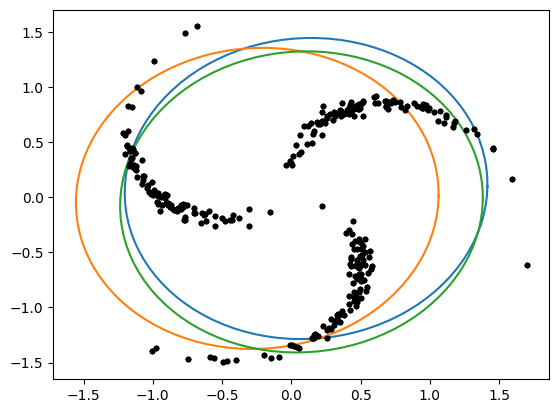

likelihood -656.1822817270356
aic,bic 1334.3645634540712 1375.1061706752894


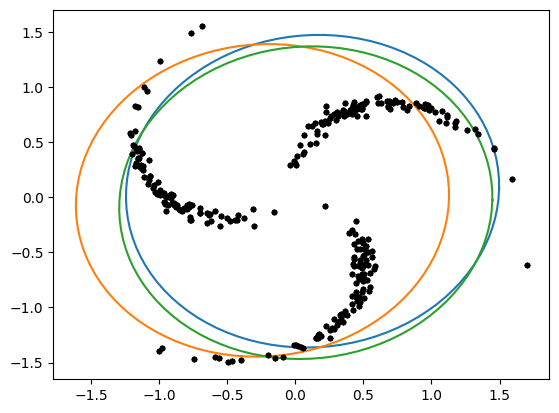

likelihood -655.9076644742253
aic,bic 1333.8153289484505 1374.5569361696687


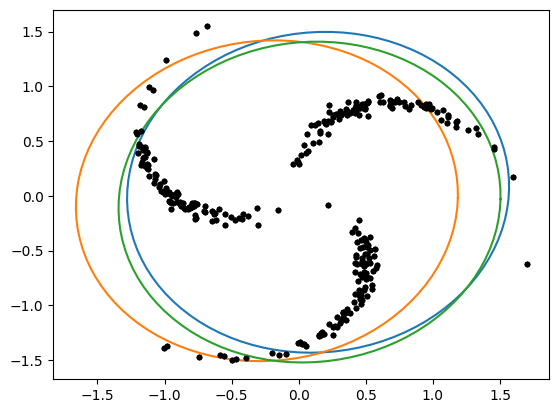

likelihood -656.728309097562
aic,bic 1335.456618195124 1376.1982254163422


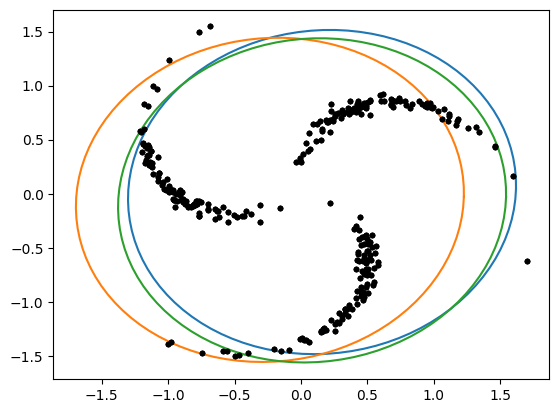

likelihood -657.4636940077587
aic,bic 1336.9273880155174 1377.6689952367356


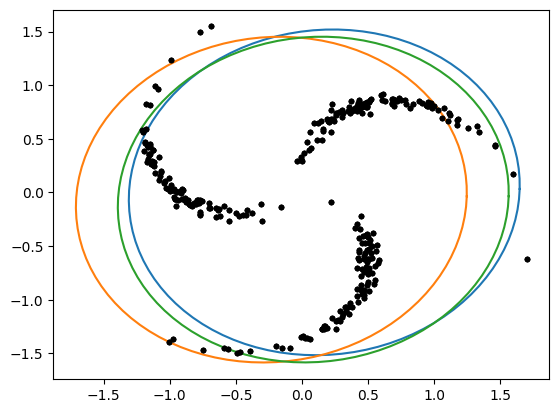

likelihood -657.6045582599806
aic,bic 1337.2091165199613 1377.9507237411794


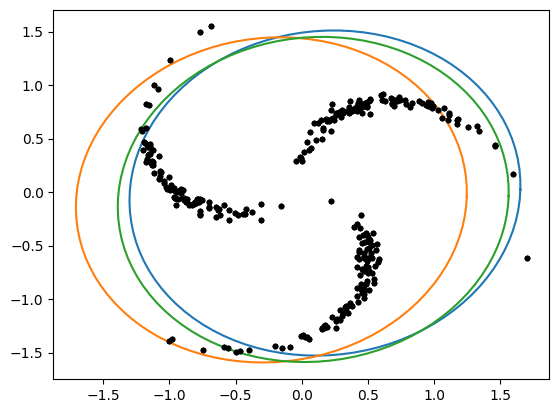

likelihood -657.2151833894802
aic,bic 1336.4303667789604 1377.1719740001786


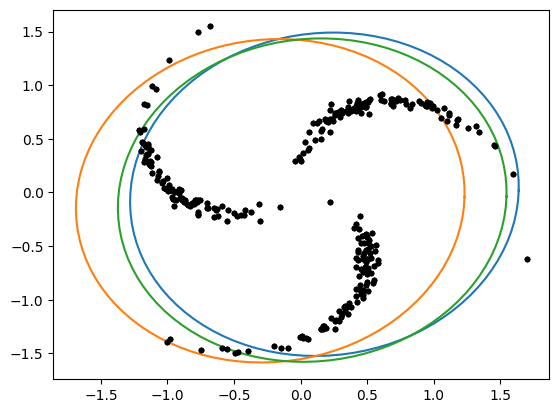

likelihood -656.6469311666859
aic,bic 1335.2938623333719 1376.03546955459


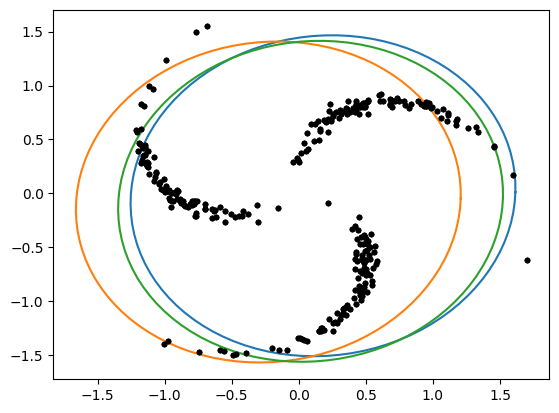

likelihood -656.2469514067093
aic,bic 1334.4939028134186 1375.2355100346367


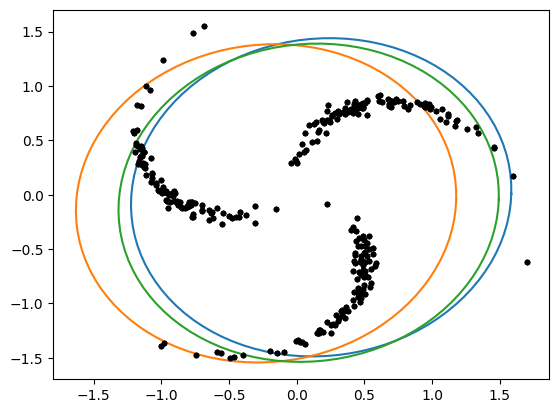

likelihood -656.1509787800867
aic,bic 1334.3019575601734 1375.0435647813915


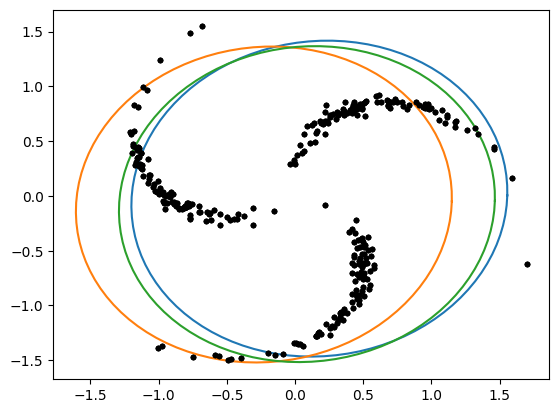

likelihood -656.2430409113254
aic,bic 1334.4860818226507 1375.2276890438688


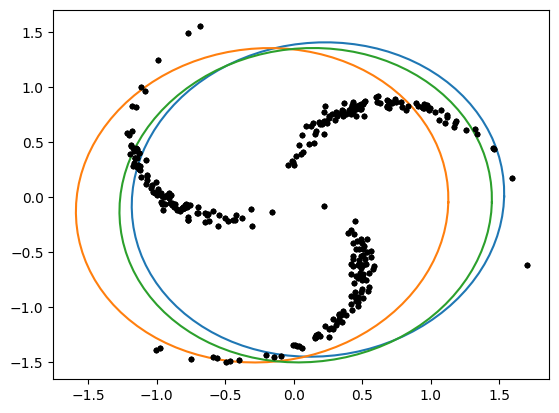

likelihood -656.3005158643216
aic,bic 1334.6010317286432 1375.3426389498613


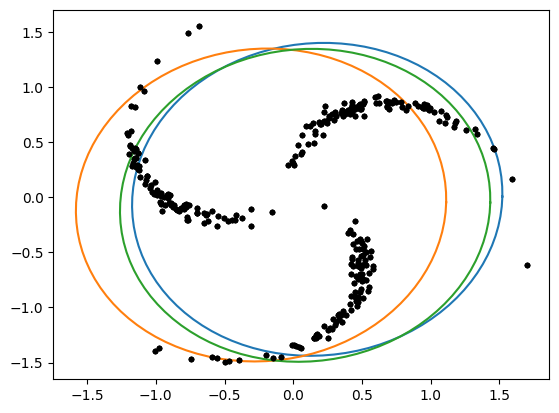

likelihood -656.1967074174463
aic,bic 1334.3934148348926 1375.1350220561108


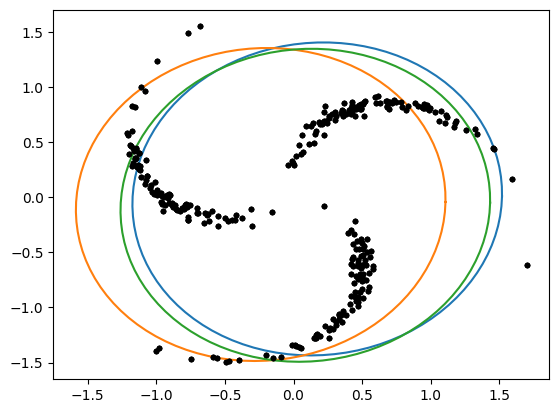

likelihood -655.9754658780907
aic,bic 1333.9509317561815 1374.6925389773996


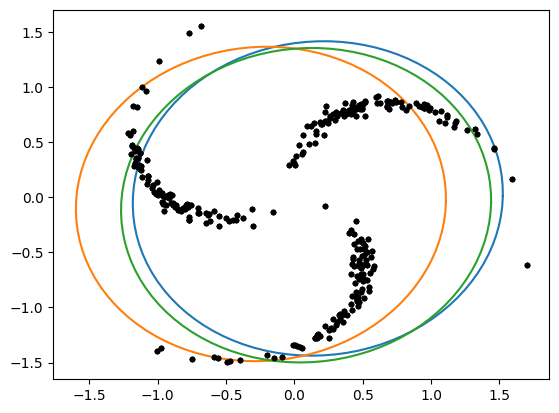

likelihood -655.7613378601483
aic,bic 1333.5226757202965 1374.2642829415147


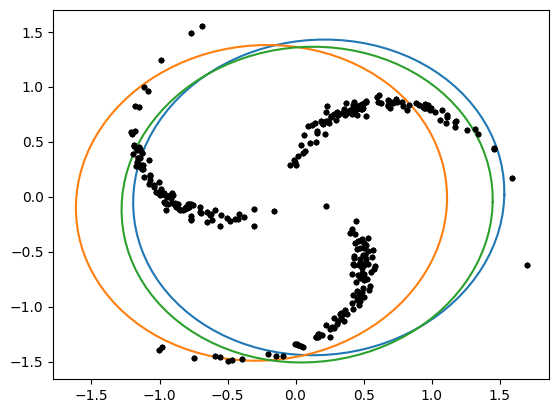

likelihood -655.6368058913608
aic,bic 1333.2736117827217 1374.0152190039398


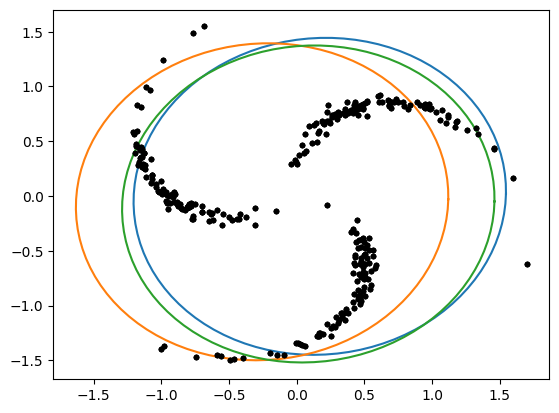

likelihood -655.6006199196472
aic,bic 1333.2012398392944 1373.9428470605126


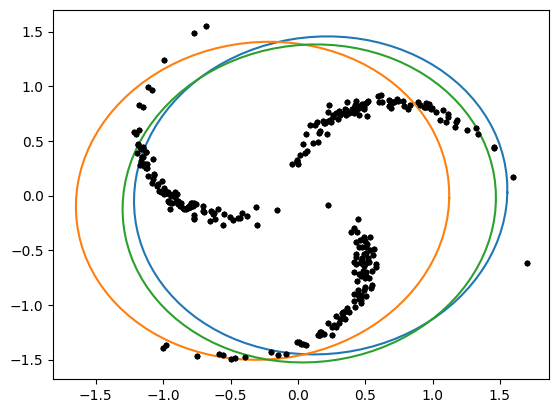

likelihood -655.603129241011
aic,bic 1333.206258482022 1373.94786570324


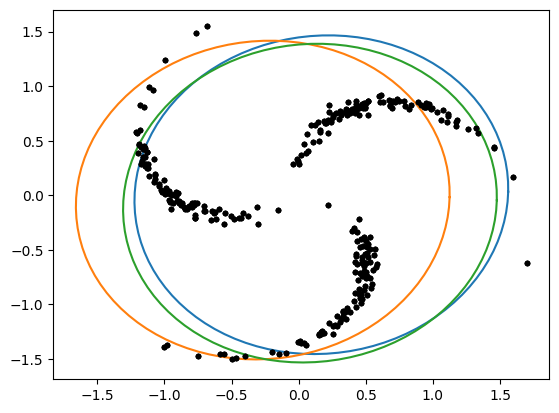

likelihood -655.5977650846362
aic,bic 1333.1955301692724 1373.9371373904905


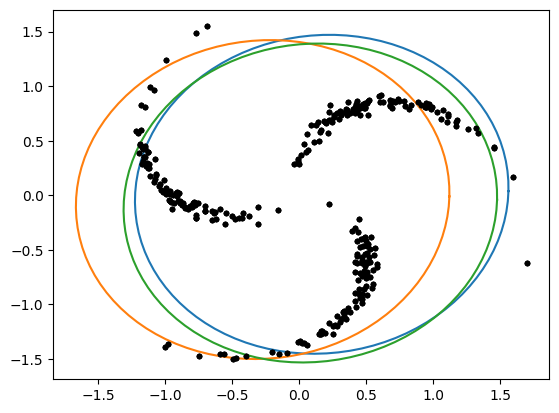

likelihood -655.5676268603831
aic,bic 1333.1352537207663 1373.8768609419844


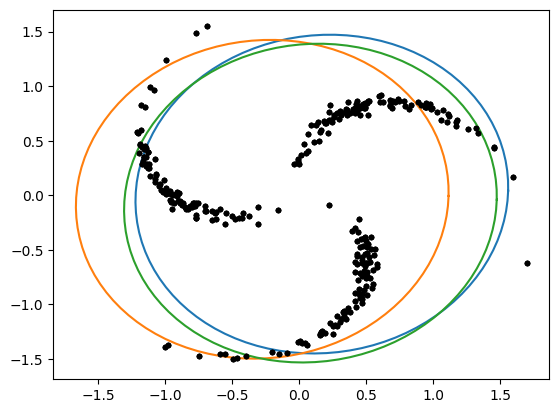

likelihood -655.522341716755
aic,bic 1333.04468343351 1373.7862906547282


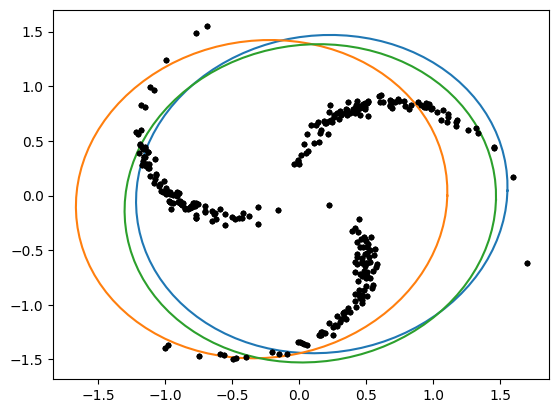

likelihood -655.4799116729799
aic,bic 1332.9598233459599 1373.701430567178


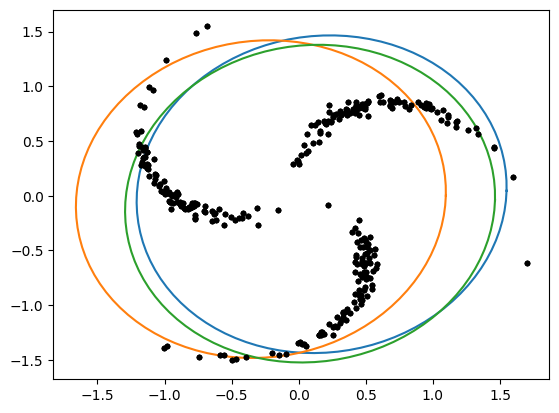

likelihood -655.4504396469137
aic,bic 1332.9008792938273 1373.6424865150454


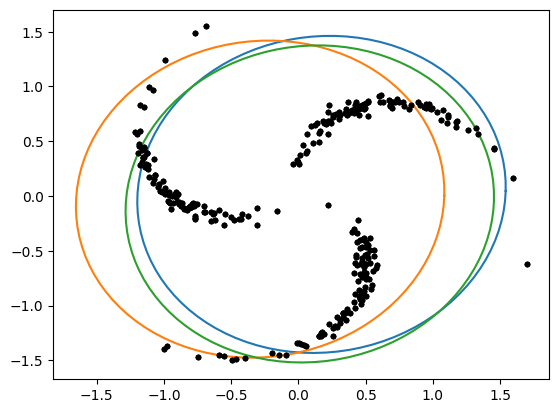

likelihood -655.4311881007607
aic,bic 1332.8623762015213 1373.6039834227395


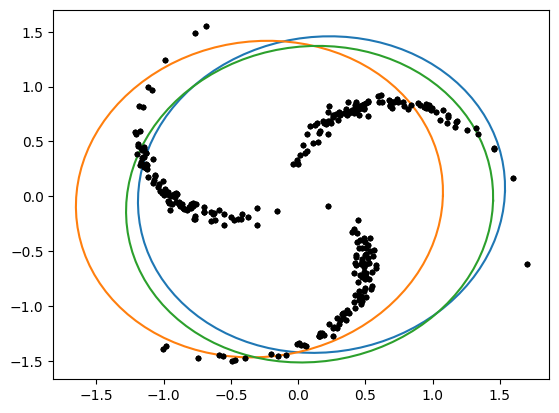

likelihood -655.4122925713626
aic,bic 1332.8245851427253 1373.5661923639434


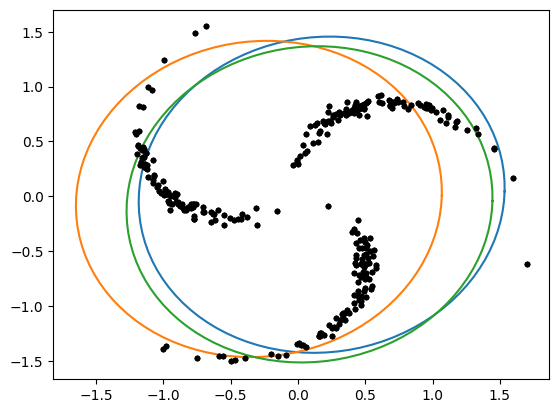

likelihood -655.3856622584873
aic,bic 1332.7713245169746 1373.5129317381927


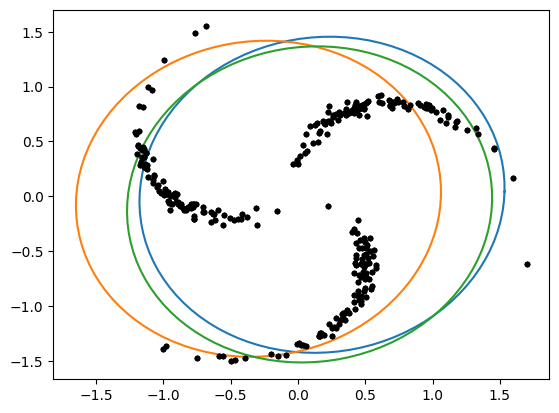

likelihood -655.3497202422616
aic,bic 1332.6994404845232 1373.4410477057413


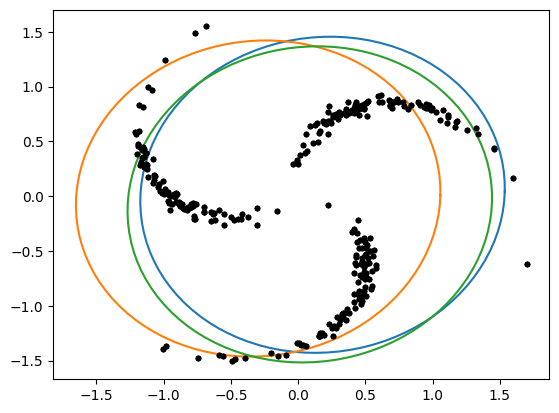

likelihood -655.307994943531
aic,bic 1332.615989887062 1373.35759710828


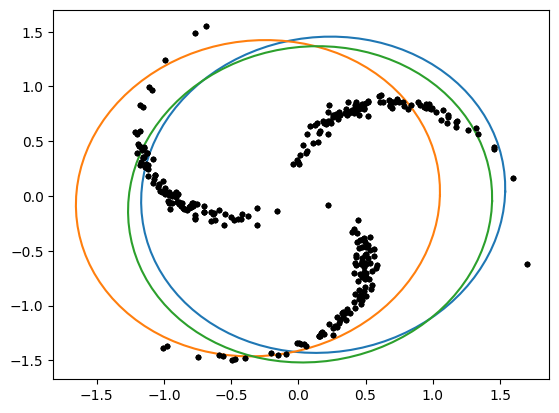

likelihood -655.2647129438471
aic,bic 1332.5294258876943 1373.2710331089124


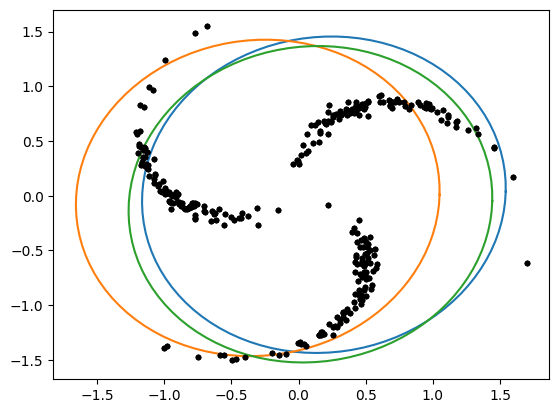

likelihood -655.2215623140509
aic,bic 1332.4431246281017 1373.1847318493199


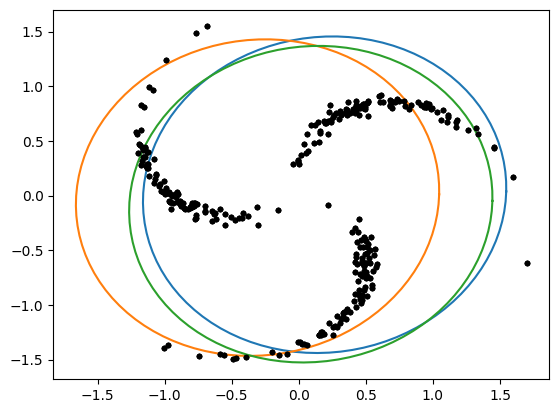

likelihood -655.1773716498818
aic,bic 1332.3547432997636 1373.0963505209818


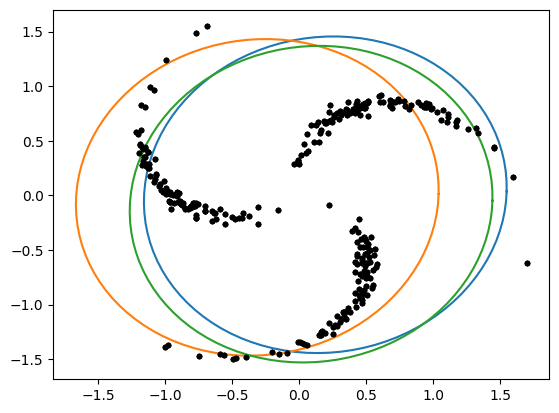

likelihood -655.1297376102461
aic,bic 1332.2594752204923 1373.0010824417104


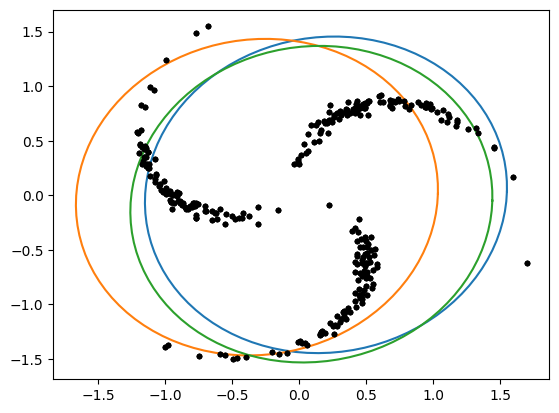

likelihood -655.0767155302411
aic,bic 1332.1534310604823 1372.8950382817004


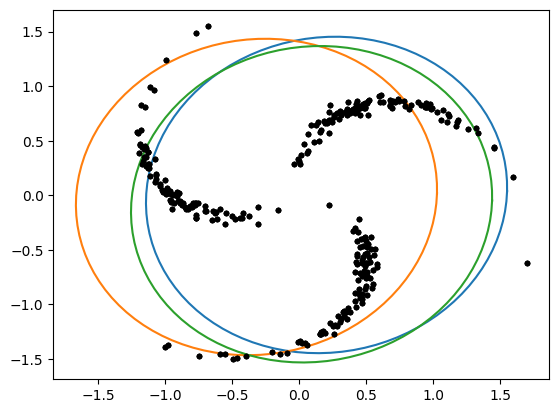

likelihood -655.0174292161701
aic,bic 1332.0348584323401 1372.7764656535583


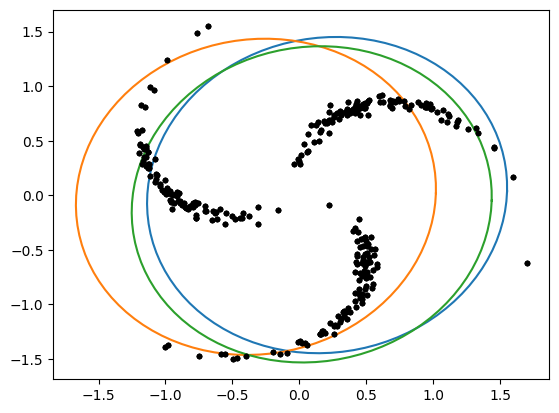

likelihood -654.9516352237041
aic,bic 1331.9032704474082 1372.6448776686263


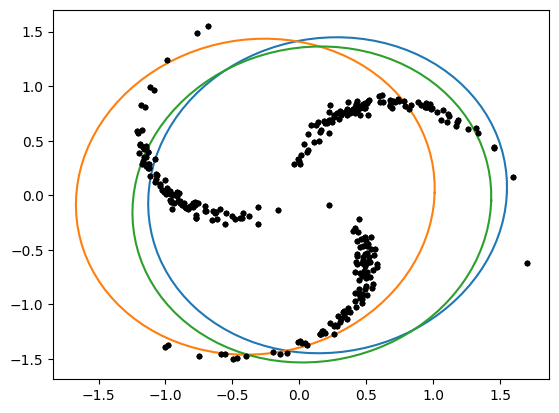

likelihood -654.878937531454
aic,bic 1331.757875062908 1372.499482284126


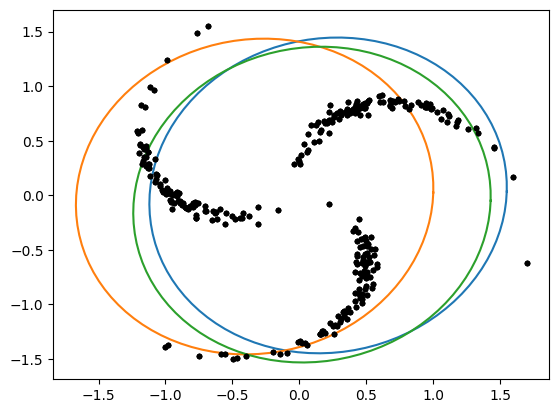

likelihood -654.7982877073644
aic,bic 1331.5965754147287 1372.3381826359469


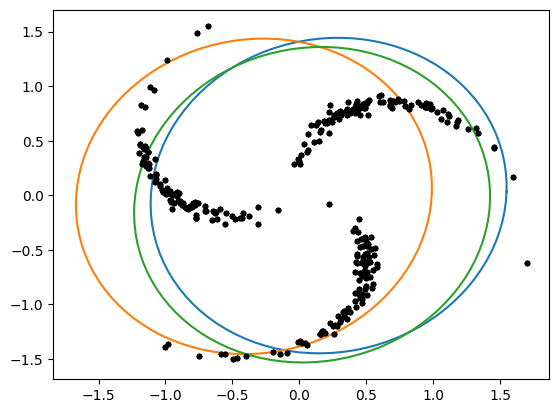

likelihood -654.7079566009695
aic,bic 1331.415913201939 1372.1575204231572


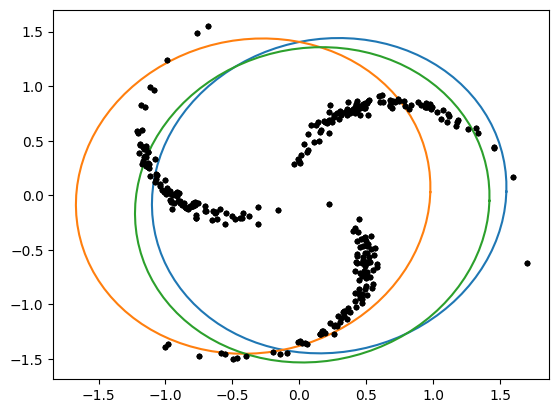

likelihood -654.6057669559474
aic,bic 1331.2115339118948 1371.953141133113


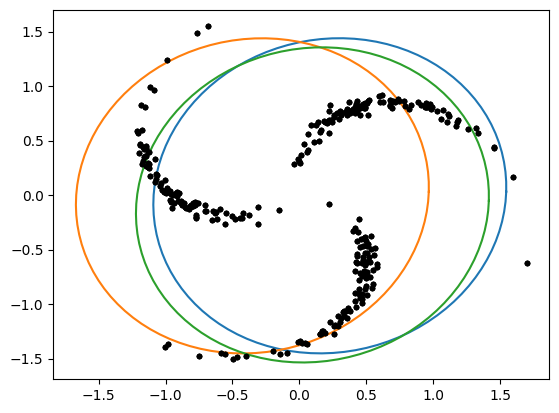

likelihood -654.4892677029923
aic,bic 1330.9785354059845 1371.7201426272027


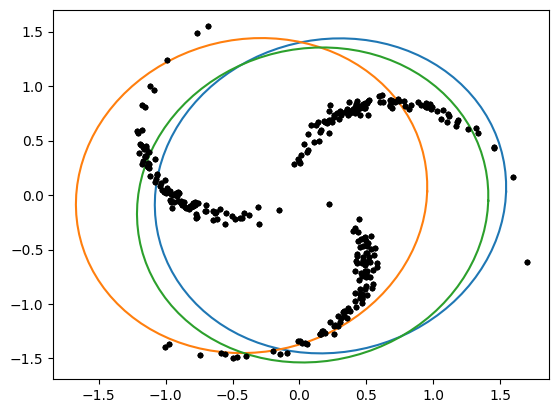

likelihood -654.3556685211792
aic,bic 1330.7113370423583 1371.4529442635765


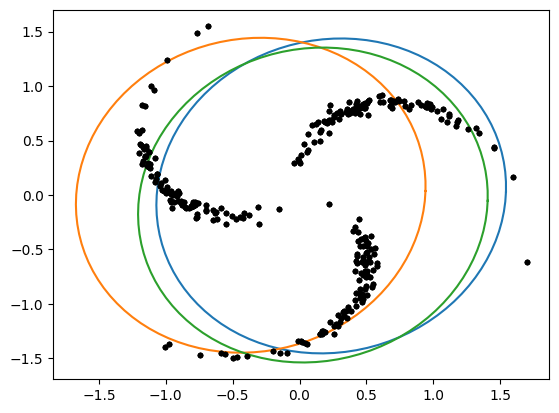

likelihood -654.2015479016843
aic,bic 1330.4030958033686 1371.1447030245868


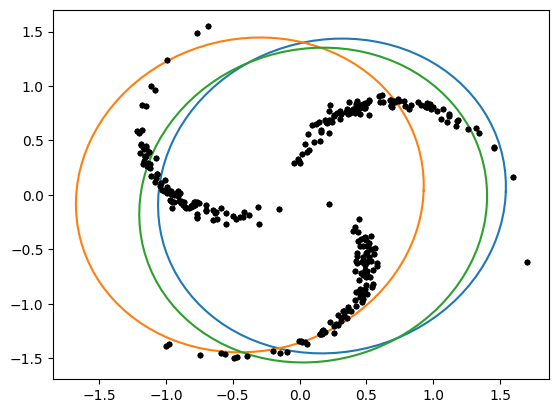

likelihood -654.0224424330945
aic,bic 1330.044884866189 1370.7864920874072


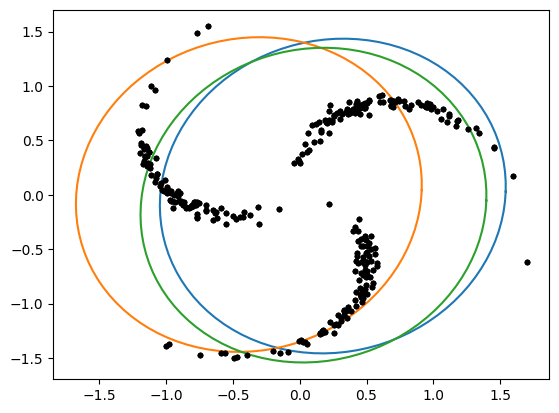

likelihood -653.8123871302296
aic,bic 1329.6247742604592 1370.3663814816773


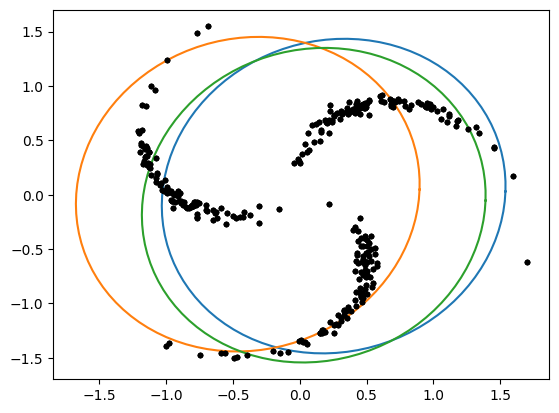

likelihood -653.5633697324236
aic,bic 1329.126739464847 1369.8683466860653


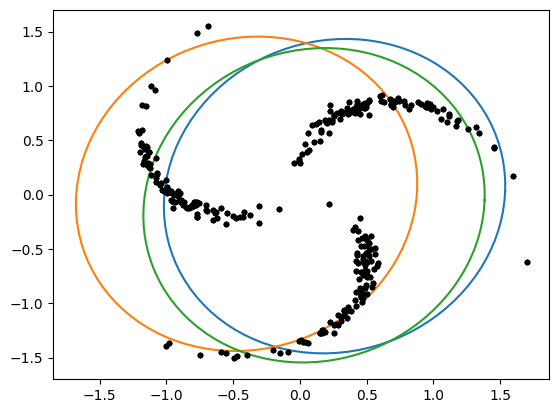

likelihood -653.2645597007909
aic,bic 1328.5291194015817 1369.2707266227999


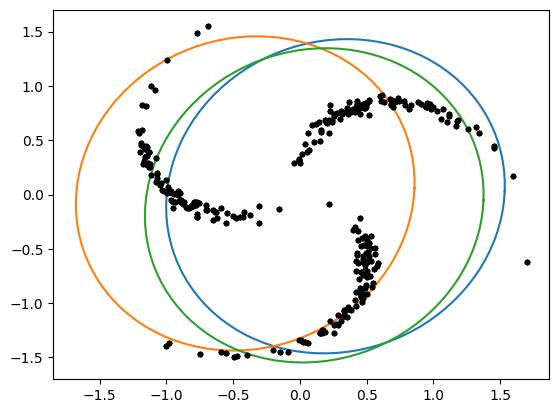

likelihood -652.9010970969642
aic,bic 1327.8021941939285 1368.5438014151466


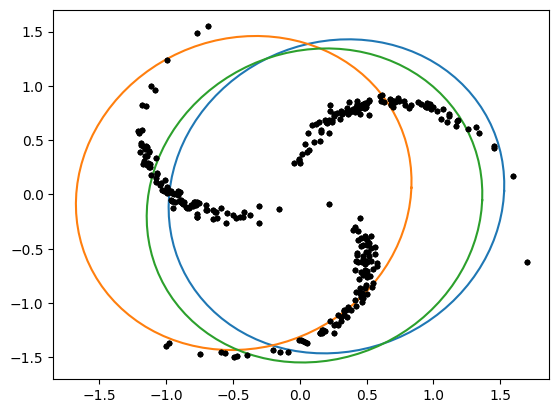

likelihood -652.4521386299451
aic,bic 1326.9042772598903 1367.6458844811084


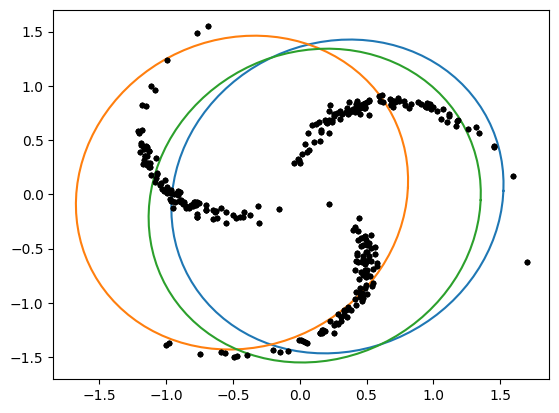

likelihood -651.887678231076
aic,bic 1325.775356462152 1366.5169636833702


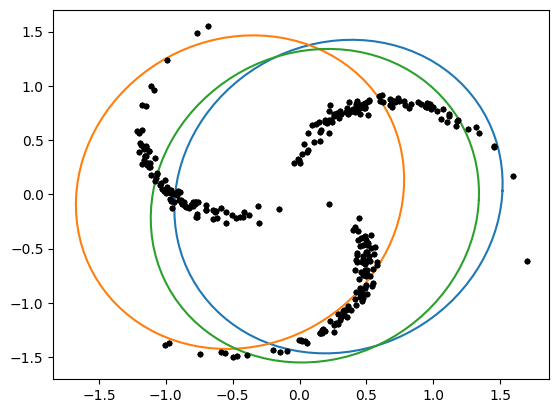

likelihood -651.1632743920534
aic,bic 1324.3265487841068 1365.068156005325


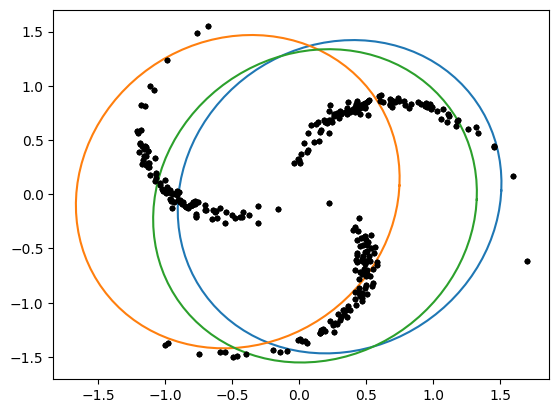

likelihood -650.2110408595067
aic,bic 1322.4220817190135 1363.1636889402316


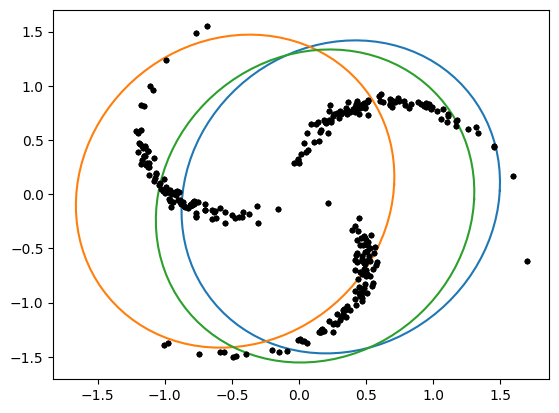

likelihood -648.9237315417922
aic,bic 1319.8474630835844 1360.5890703048026


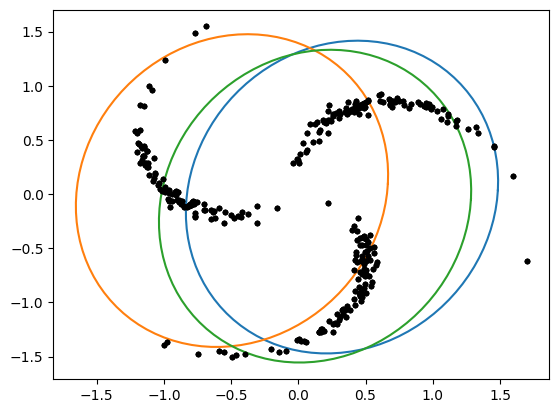

likelihood -647.1257869477215
aic,bic 1316.251573895443 1356.9931811166612


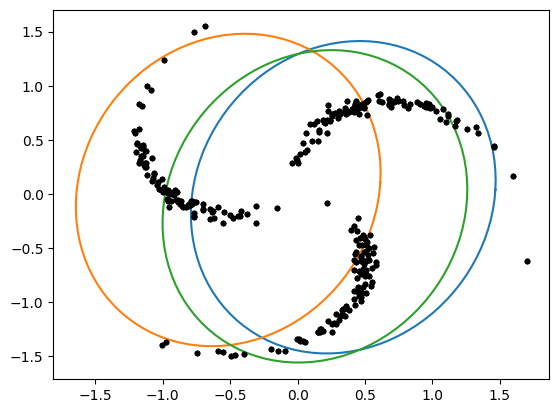

likelihood -644.5198338887747
aic,bic 1311.0396677775493 1351.7812749987675


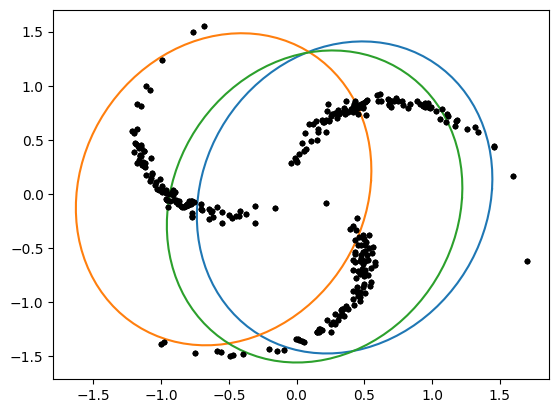

likelihood -640.5901688360627
aic,bic 1303.1803376721255 1343.9219448933436


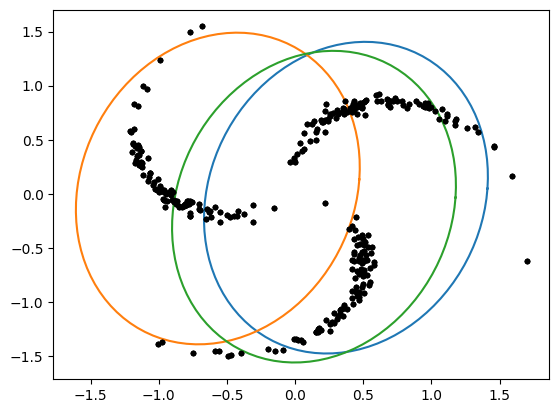

likelihood -634.4538784214908
aic,bic 1290.9077568429816 1331.6493640641997


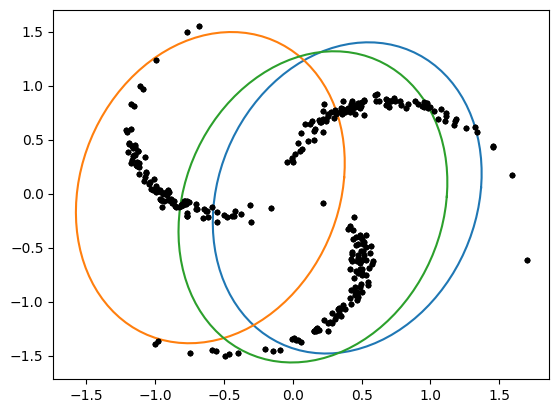

likelihood -624.7894042555752
aic,bic 1271.5788085111503 1312.3204157323685


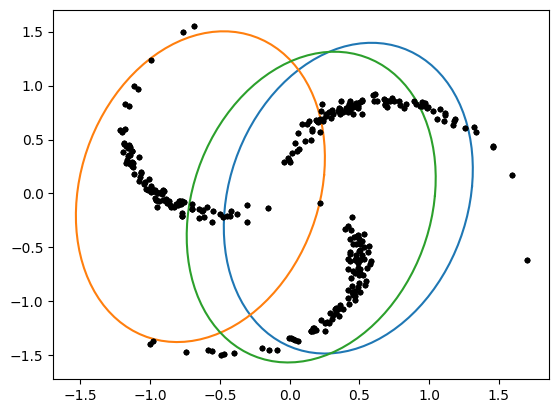

likelihood -610.705428117376
aic,bic 1243.410856234752 1284.15246345597


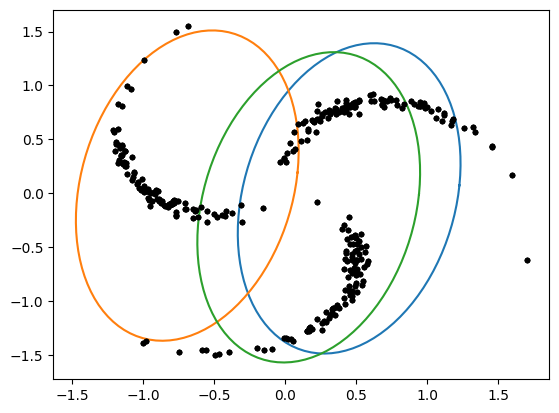

likelihood -595.8929753952141
aic,bic 1213.7859507904282 1254.5275580116463


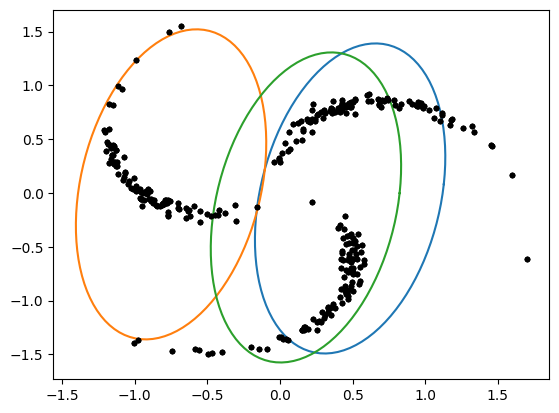

likelihood -590.0503010612799
aic,bic 1202.1006021225598 1242.842209343778


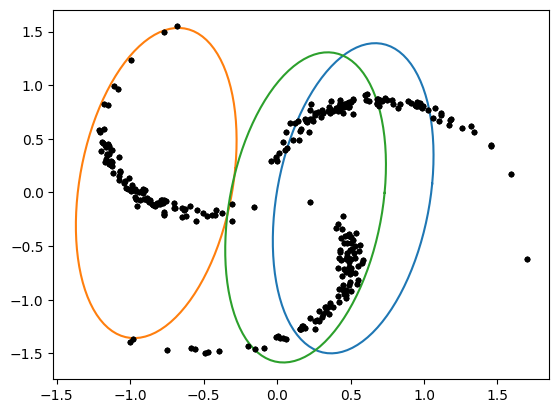

likelihood -585.8737207993381
aic,bic 1193.7474415986762 1234.4890488198944


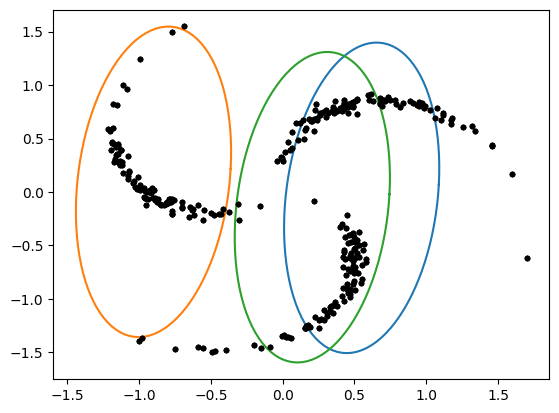

likelihood -588.0738130399614
aic,bic 1198.1476260799227 1238.8892333011408


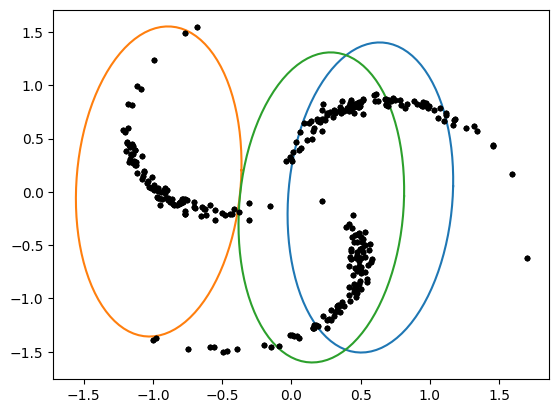

likelihood -592.5696408764354
aic,bic 1207.1392817528708 1247.880888974089


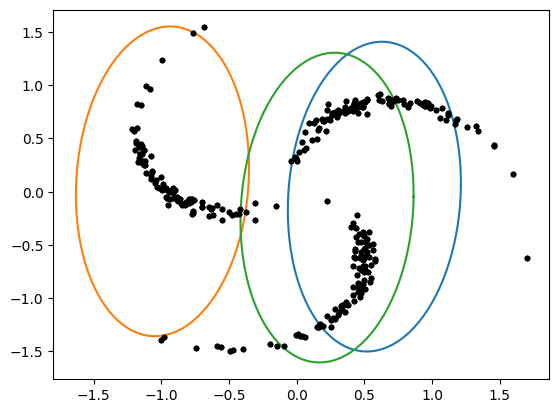

likelihood -592.0752101465773
aic,bic 1206.1504202931546 1246.8920275143728


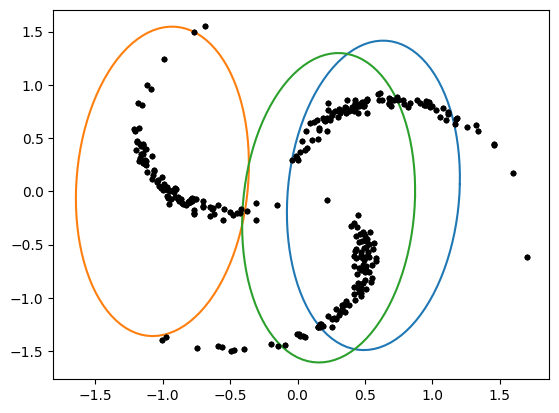

likelihood -588.1870615453905
aic,bic 1198.374123090781 1239.1157303119992


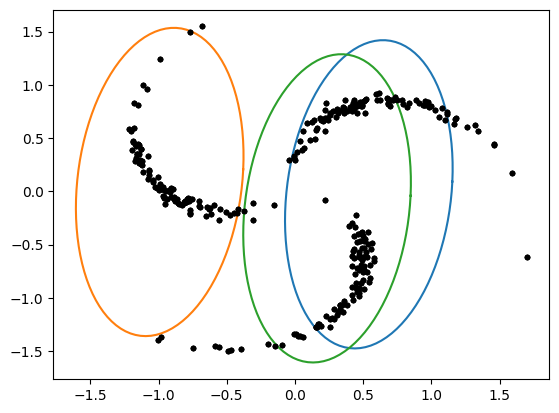

likelihood -585.441273189029
aic,bic 1192.882546378058 1233.624153599276


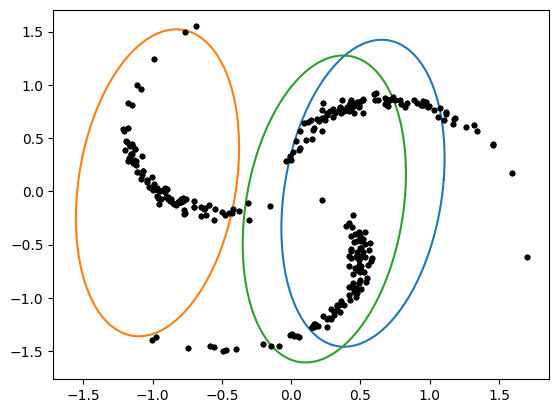

likelihood -583.6621756210948
aic,bic 1189.3243512421896 1230.0659584634077


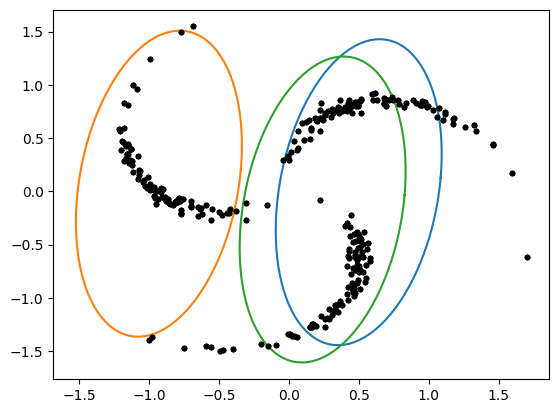

likelihood -582.6830779146201
aic,bic 1187.3661558292401 1228.1077630504583


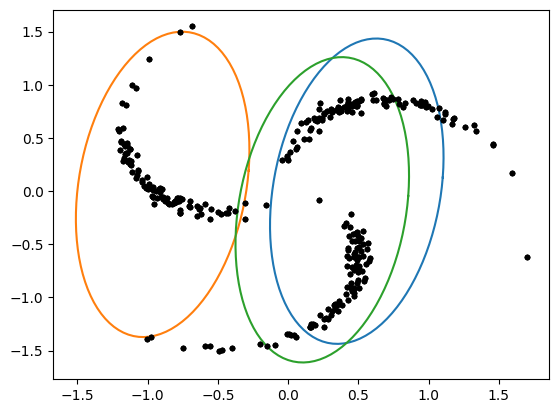

likelihood -583.1128046980822
aic,bic 1188.2256093961644 1228.9672166173825


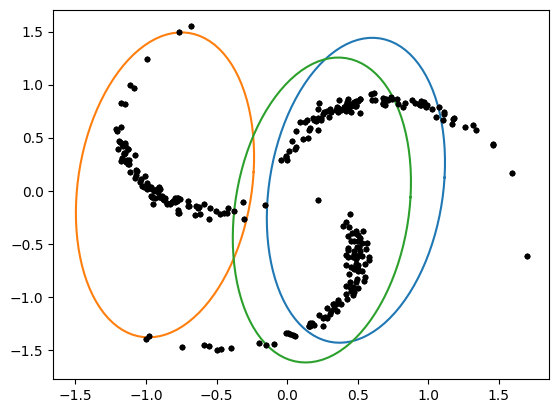

likelihood -583.1940824866161
aic,bic 1188.3881649732323 1229.1297721944504


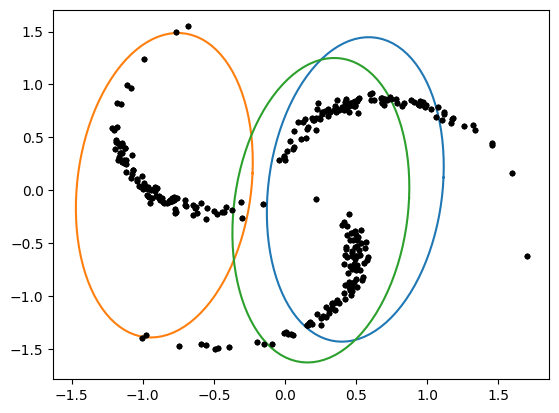

likelihood -582.8444112664058
aic,bic 1187.6888225328116 1228.4304297540298


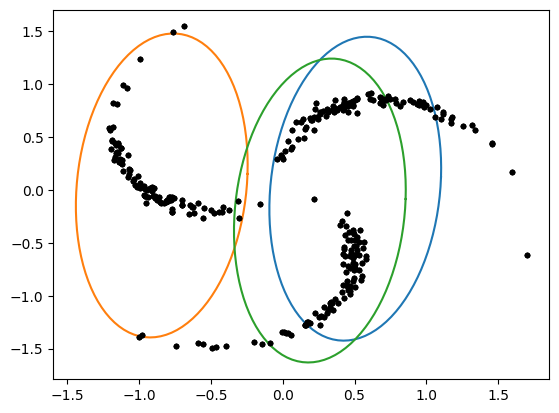

likelihood -582.4307430330487
aic,bic 1186.8614860660973 1227.6030932873155


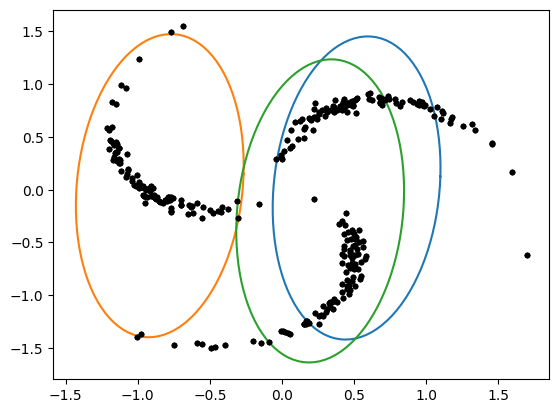

likelihood -581.6988089488693
aic,bic 1185.3976178977387 1226.1392251189568


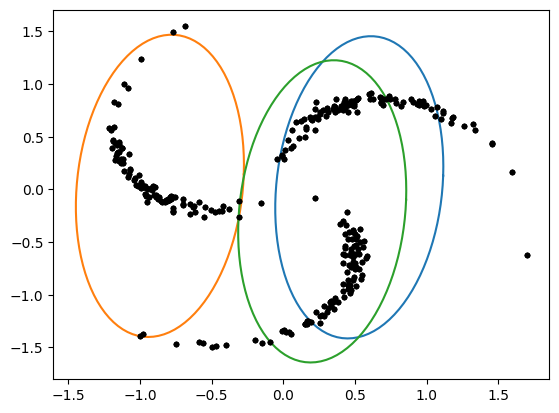

likelihood -581.2909943893961
aic,bic 1184.5819887787923 1225.3235960000104


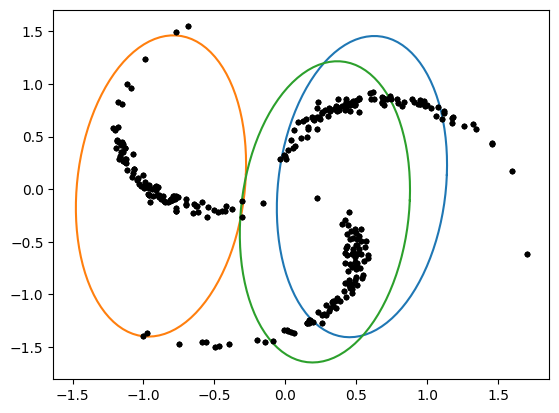

likelihood -581.1848325806087
aic,bic 1184.3696651612174 1225.1112723824356


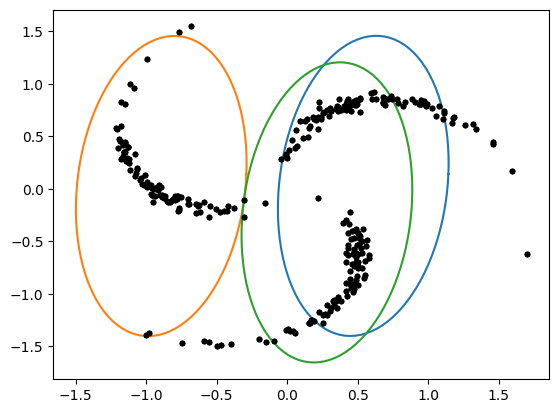

likelihood -581.0255378482976
aic,bic 1184.0510756965953 1224.7926829178134


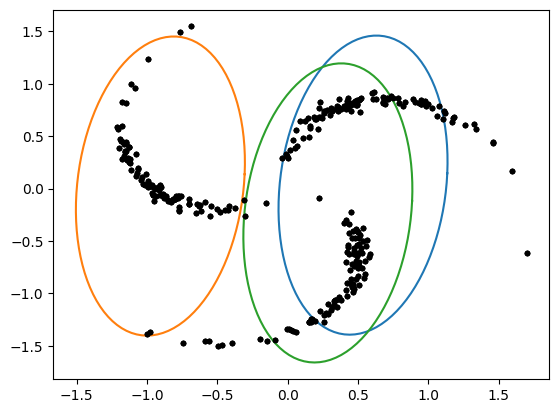

likelihood -580.9109741159423
aic,bic 1183.8219482318846 1224.5635554531027


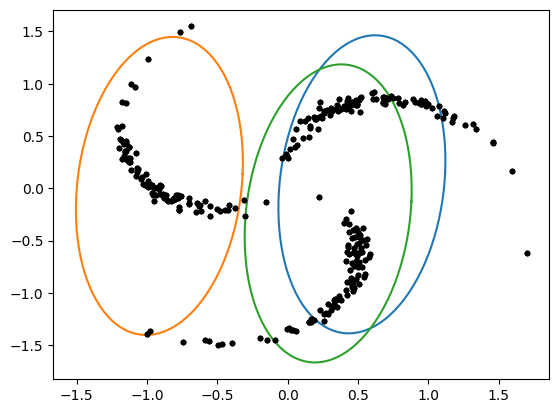

likelihood -580.7769545613996
aic,bic 1183.5539091227993 1224.2955163440174


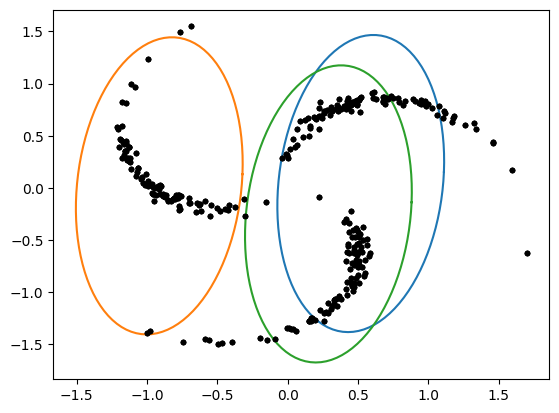

likelihood -580.5963946983987
aic,bic 1183.1927893967975 1223.9343966180156


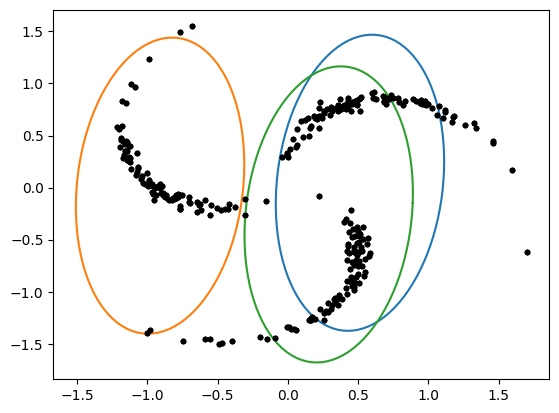

likelihood -580.4390352281251
aic,bic 1182.8780704562503 1223.6196776774684


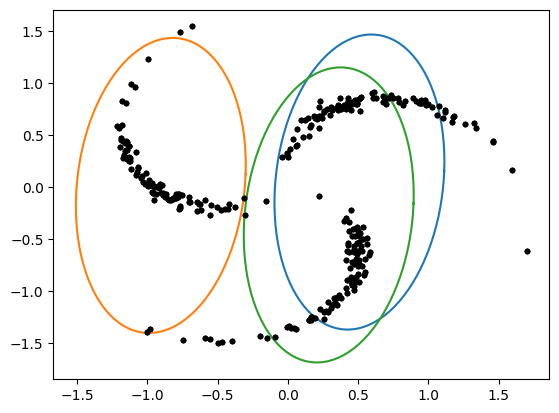

likelihood -580.2387929945296
aic,bic 1182.4775859890592 1223.2191932102774


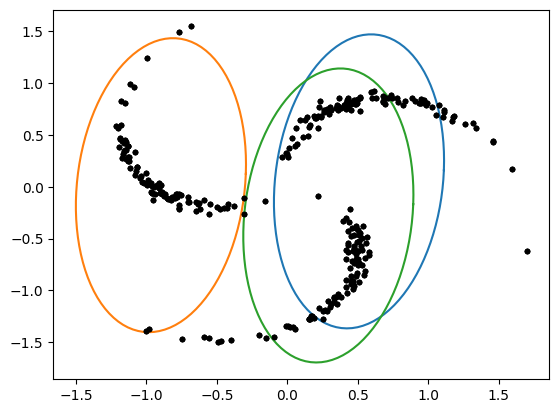

likelihood -580.0434847519355
aic,bic 1182.086969503871 1222.828576725089


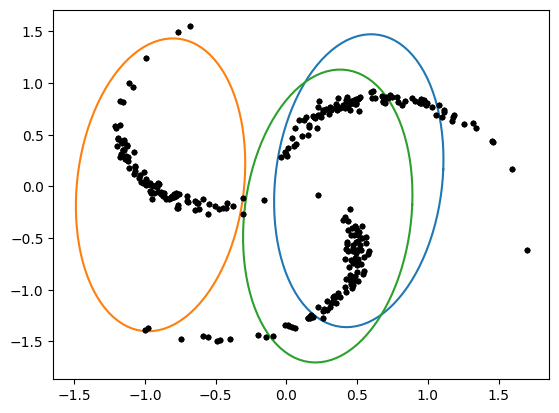

likelihood -579.8865420223256
aic,bic 1181.7730840446511 1222.5146912658693


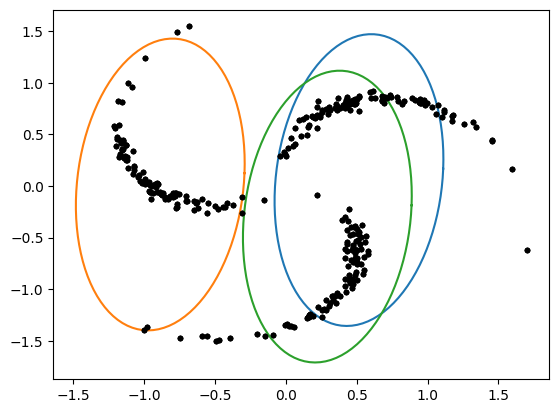

likelihood -579.7208986433076
aic,bic 1181.4417972866152 1222.1834045078333


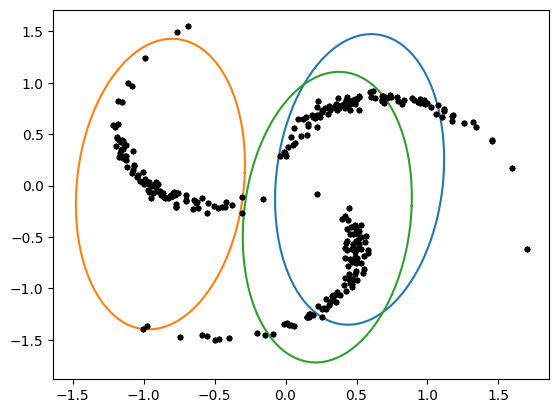

likelihood -579.5622762620139
aic,bic 1181.1245525240279 1221.866159745246


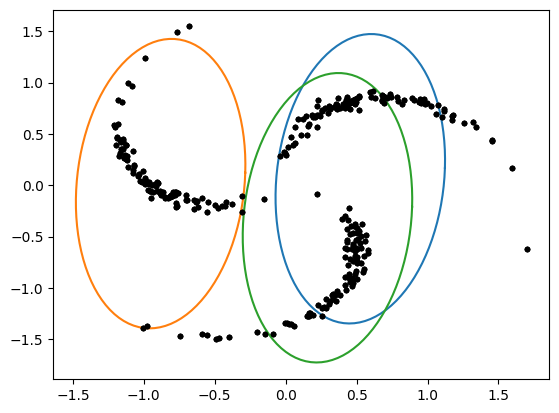

likelihood -579.3909736987075
aic,bic 1180.781947397415 1221.5235546186332


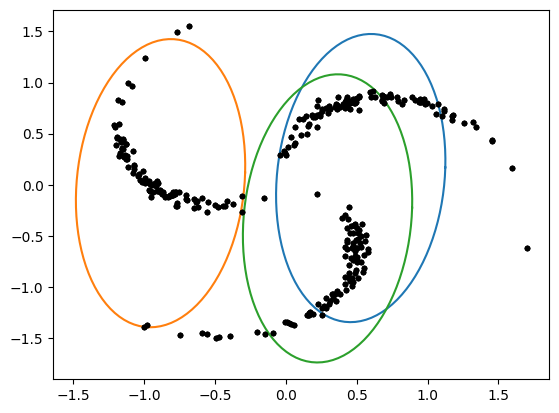

likelihood -579.1837468251539
aic,bic 1180.3674936503078 1221.109100871526


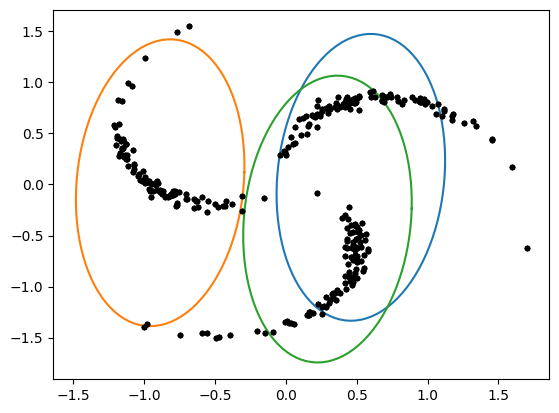

likelihood -578.9605669819441
aic,bic 1179.9211339638882 1220.6627411851064


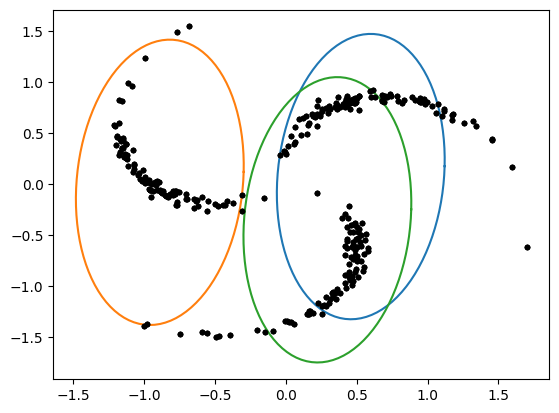

likelihood -578.7249612076976
aic,bic 1179.4499224153951 1220.1915296366133


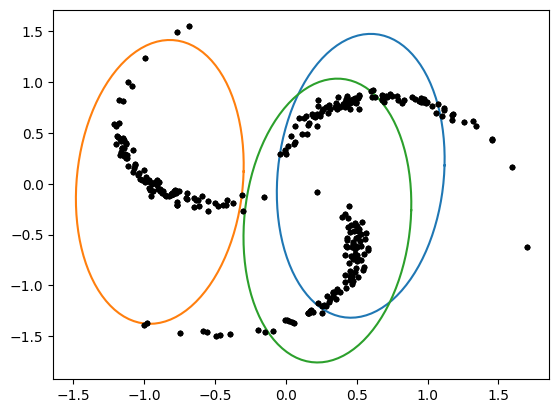

likelihood -578.4843451649748
aic,bic 1178.9686903299496 1219.7102975511677


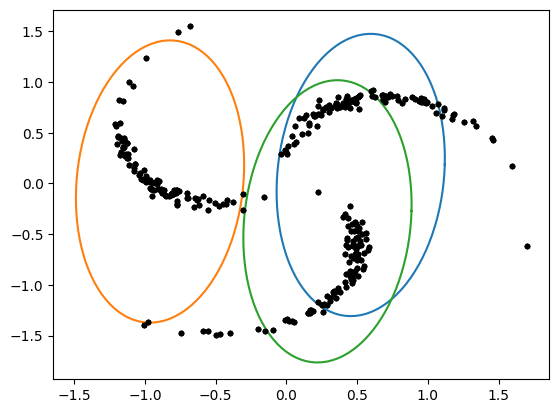

In [7]:
for params in params_store:
    print("likelihood",test_GMM.likelihood(params))
    print("aic,bic",test_GMM.aic(params),test_GMM.bic(params))
    

    draw_clusters(test_GMM.unpack_params(params),data)

In [8]:
### Final labels

np.array(test_GMM.labels(data,params_store[-1]))

array([1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d